**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 2: Basic Data Handling**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 2.1
(a) Recreate Figure 2.1 from the data located in file EXRUK.XLS.

In [1]:
import pandas as pd
colnames = ['t', 'Pence per dollar']
exkruk = pd.read_excel(r'datasets\EXRUK.xls', header = None, names = colnames, index_col = 0)
exkruk

,Pence per dollar
t,
1947-01-01,402.934
1947-02-01,402.740
1947-03-01,402.735
1947-04-01,402.743
1947-05-01,402.740
...,...
1996-06-01,154.160
1996-07-01,155.300
1996-08-01,154.990


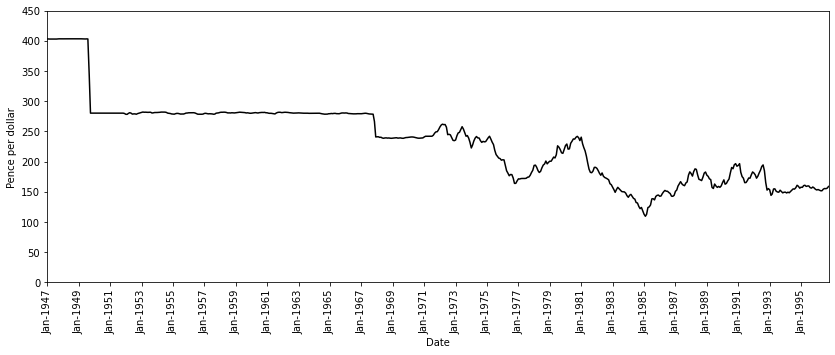

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (14,5))
ax.plot('Pence per dollar', data = exkruk, color = 'k', linestyle = '-')
ax.set_ylabel('Pence per dollar')
ax.set_xlabel('Date')
ax.set_ylim(0, 450)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
locator = mdates.YearLocator(1)
ax.xaxis.set_major_locator(locator)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_visible(False)
plt.xticks(rotation = 90) 
ax.margins(x = 0)

(b) File INCOME.XLS contains data on the natural logarithm of personal income and consumption in the USA from 1954Q1 to 1994Q2.6 Make one time series graph that contains both of these variables.

In [3]:
income = pd.read_excel(r'datasets\INCOME.xls', index_col = 0, parse_dates = True)
income

,Income,Consumption
Date,,
1954-01-01,6.968380,6.876368
1954-04-01,6.962811,6.884384
1954-07-01,6.978214,6.900630
1954-10-01,6.997322,6.918102
1955-01-01,7.004156,6.932545
...,...,...
1993-10-01,8.228924,8.162294
1994-01-01,8.237268,8.173671
1994-04-01,8.245778,8.176909


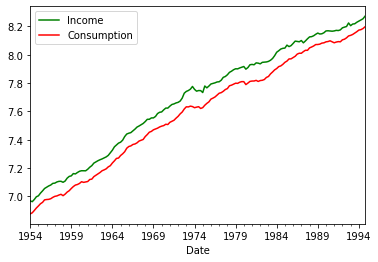

In [4]:
income.plot(color = ['g', 'r']);

(c) Transform the logged personal income data to growth rates. Note that the
percentage change in personal income between period t − 1 and t is approximately
100×[ln(Y_t) − ln(Yt−1)] and the data provided in INCOME.XLS is
already logged. Make a time series graph of the series you have created.

In [5]:
d_income = 100*income['Income'].diff(1)
d_income

Date
1954-01-01        NaN
1954-04-01   -0.55684
1954-07-01    1.54022
1954-10-01    1.91080
1955-01-01    0.68341
               ...   
1993-10-01    1.05685
1994-01-01    0.83433
1994-04-01    0.85105
1994-07-01    0.76839
1994-10-01    1.80864
Name: Income, Length: 164, dtype: float64

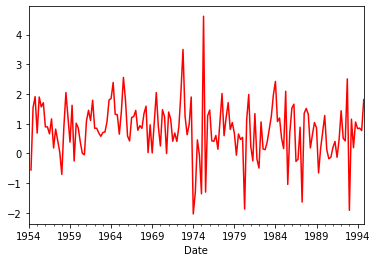

In [6]:
d_income.plot(color = 'r');

# Exercise 2.2
(a) Recreate the histogram in Figure 2.2.

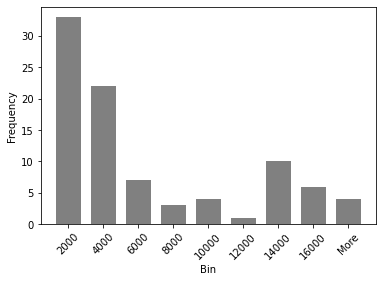

In [7]:
import numpy as np
gdp_pc = pd.read_excel(r'datasets\GDPPC.xls', index_col = 0, header = None)
my_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]  
plt.figure()
hist = gdp_pc[3].hist(bins = my_bins, color = 'grey', grid = False, rwidth = 0.7)
hist.set(xlabel = 'Bin', ylabel = 'Frequency')
plt.xticks(np.arange(1000, 18000, step = 2000), (2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 'More'), rotation = 45)
plt.show()

(b) Create histograms using different class intervals. For instance, begin by letting
your software package choose default values and see what you get, then try
values of your own.

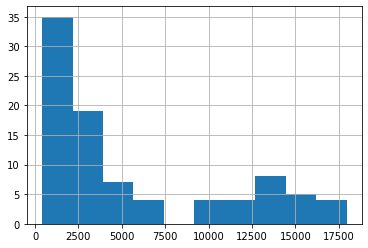

In [8]:
gdp_pc[3].hist();

# Exercise 2.3
The file FOREST.XLS contains data on the percentage increase in cropland from
1980 to 1990 and on the percentage increase in permanent pasture over the same
period.

(a) Construct and interpret XY-plots of these two variables (one at a time) against deforestation.

(b) Does there seem to be a positive relationship between deforestation and expansion of pasture land?

(c) How about between deforestation and the expansion of cropland?

In [9]:
forest = pd.read_excel(r'datasets\FOREST.xls')
forest

,Forest loss,Pop dens,Crop ch,Pasture ch
0,0.7,357.0,27.9,0.0
1,0.7,48.0,1.7,0.0
2,0.8,932.0,14.5,0.0
3,0.7,366.0,17.9,0.0
4,0.8,83.0,2.2,0.0
...,...,...,...,...
65,0.6,327.0,4.1,5.8
66,1.7,409.0,9.4,29.2
67,2.4,117.0,26.7,33.5
68,0.4,179.0,6.1,0.0


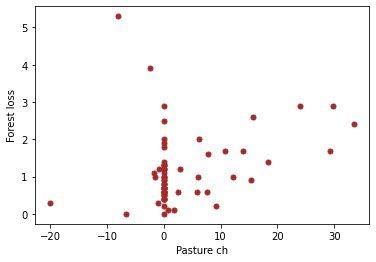

In [10]:
forest.plot.scatter(x = 'Pasture ch', y = 'Forest loss', c = 'brown', s = 25, marker = 'o');

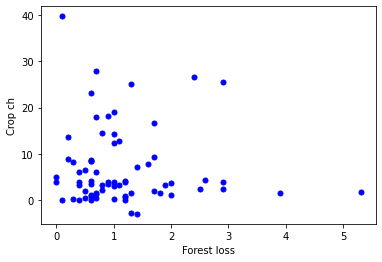

In [11]:
forest.plot.scatter(x = 'Forest loss', y = 'Crop ch', c = 'blue', s = 25, marker = 'o');

# Exercise 2.4
Construct and interpret descriptive statistics for the pasture change and cropland change variables in FOREST.XLS.

In [12]:
print('pasture_ch_mean = ', forest['Pasture ch'].mean(), '\n' 
    'cropland_ch_mean = ', forest['Crop ch'].mean(), '\n'
    'pasture_ch_std = ', forest['Pasture ch'].std(), '\n'
    'cropland_ch_std = ', forest['Crop ch'].std())

pasture_ch_mean =  3.002857142857143 
cropland_ch_mean =  6.937142857142858 
pasture_ch_std =  8.44480753641681 
cropland_ch_std =  8.305021554624306
